# Pneumonia Detection Using XRay Images

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import os, os.path
import fnmatch

import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
path, dirs, normal_lungs = next(os.walk('/content/drive/MyDrive/Capstone Project/chest_xray/train/NORMAL'))
normal_lungs_count = len(normal_lungs)
print('Normal Chest XRays in the training dataset: ' + str(normal_lungs_count) + ' images')

path, dirs, damaged_lungs = next(os.walk('/content/drive/MyDrive/Capstone Project/chest_xray/train/PNEUMONIA'))
damaged_lungs_count = len(damaged_lungs)
print('Pneumonia Chest XRays in the training dataset: ' + str(damaged_lungs_count) + ' images')

Normal Chest XRays in the training dataset: 1341 images
Pneumonia Chest XRays in the training dataset: 3875 images


In [ ]:
train_dir = '/content/drive/MyDrive/Capstone Project/chest_xray/train'
test_dir = '/content/drive/MyDrive/Capstone Project/chest_xray/test'

classes = ['PNEUMONIA','NORMAL']


In [ ]:
batch_size = 256
img_size = 224
train_generator=ImageDataGenerator(rescale=1./255,featurewise_center=False, 
        samplewise_center=False,  
        featurewise_std_normalization=False,
        samplewise_std_normalization=False,  
        zca_whitening=False,  
        rotation_range = 30,  
        zoom_range = 0.2, 
        width_shift_range=0.1, 
        height_shift_range=0.1,  
        horizontal_flip = False,   
        vertical_flip=False)
val_generator=ImageDataGenerator(rescale=1./255)
test_generator=ImageDataGenerator(rescale=1./255) 

In [ ]:
training_generator=train_generator.flow_from_directory(train_dir,
                                                    target_size=(img_size,img_size),
                                                    batch_size=batch_size,
                                                    class_mode='binary',
                                                    color_mode='grayscale')
test_generator=test_generator.flow_from_directory(test_dir,
                                                  target_size=(img_size,img_size),
                                                  batch_size=batch_size,
                                                  class_mode='binary',
                                                  color_mode='grayscale') 

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [ ]:
model=tf.keras.Sequential([
    tf.keras.layers.Conv2D(32,(3,3),input_shape=(img_size,img_size,1),activation='relu'), #karna greyscale pake 1, kalo rgb pake 3
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),


    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
  
    tf.keras.layers.Conv2D(64,(3,3),activation='relu'), 
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(64,activation='relu'), 
    tf.keras.layers.Dense(1,activation='sigmoid')
    
])


In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['acc'])


In [ ]:
train_size = len(training_generator.filenames)
test_size = len(test_generator.filenames)
train_size, test_size

(5216, 624)

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 32)      320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 109, 109, 32)      9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 52, 52, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 26, 26, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 64)        1

In [ ]:
history = model.fit_generator(generator = training_generator,
            validation_data = test_generator,
            steps_per_epoch = train_size/batch_size, 
            validation_steps = test_size/batch_size,
            epochs = 5,
            verbose = 1) 

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/5
20/20 [==============================] - 2260s 109s/step - loss: 0.5945 - acc: 0.7337 - val_loss: 0.7339 - val_acc: 0.6250
Epoch 2/5
20/20 [==============================] - 66s 3s/step - loss: 0.5464 - acc: 0.7467 - val_loss: 0.5212 - val_acc: 0.7067
Epoch 3/5
20/20 [==============================] - 65s 3s/step - loss: 0.3658 - acc: 0.8324 - val_loss: 0.4070 - val_acc: 0.8109
Epoch 4/5
20/20 [==============================] - 65s 3s/step - loss: 0.3068 - acc: 0.8610 - val_loss: 0.3687 - val_acc: 0.8269
Epoch 5/5
20/20 [==============================] - 65s 3s/step - loss: 0.2769 - acc: 0.8817 - val_loss: 0.2940 - val_acc: 0.8798


In [ ]:
val_dir = '/content/drive/MyDrive/Capstone Project/chest_xray/val'

classes = ['PNEUMONIA','NORMAL']

In [ ]:
val_generator=ImageDataGenerator(rescale=1./255)
val_generator=val_generator.flow_from_directory(val_dir,
                                                  target_size=(img_size,img_size),
                                                  batch_size=batch_size,
                                                  class_mode='binary',
                                                  color_mode='grayscale') 

Found 16 images belonging to 2 classes.


In [ ]:
print("Loss of the model is - " , model.evaluate(test_generator, steps=len(test_generator))[0]*100 , "%")
print("Accuracy of the model is - " , model.evaluate(test_generator,  steps=len(test_generator))[1]*100 , "%")

3/3 [==============================] - 5s 1s/step - loss: 0.2940 - acc: 0.8798
Loss of the model is -  29.39710021018982 %
3/3 [==============================] - 5s 1s/step - loss: 0.2940 - acc: 0.8798
Accuracy of the model is -  87.9807710647583 %


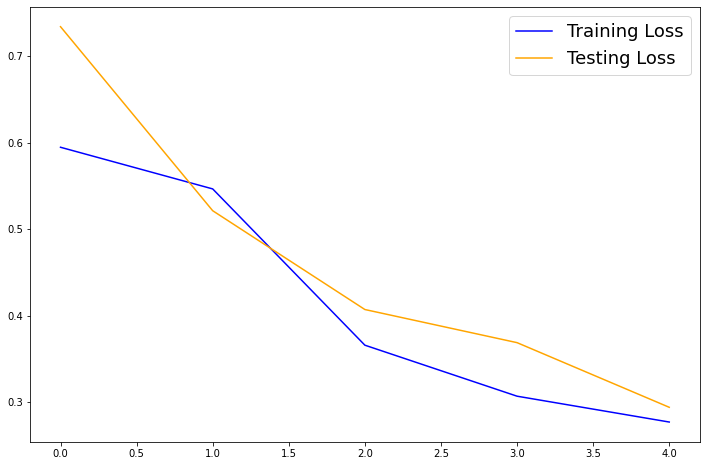

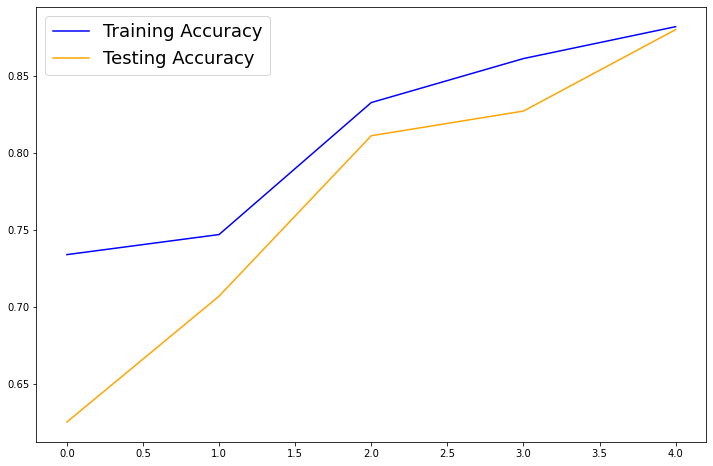

In [ ]:
train_loss = history.history['loss']
test_loss = history.history['val_loss']
# Generate line plot of training, testing loss over epochs.
plt.figure(figsize=(12, 8))
plt.plot(train_loss, label='Training Loss', color='blue')
plt.plot(test_loss, label='Testing Loss', color='orange')
plt.legend(fontsize = 18);

train_accuracy = history.history['acc']
test_accuracy = history.history['val_acc']
# Generate line plot of training, testing loss over epochs.
plt.figure(figsize=(12, 8))
plt.plot(train_accuracy, label='Training Accuracy', color='blue')
plt.plot(test_accuracy, label='Testing Accuracy', color='orange')
plt.legend(fontsize = 18);